## Tool to select random <a href="http://tectonique.net/noddy">Noddy</a> models from files
<br>First load libraries

In [1]:
try:
    import numpy as np
except:
    !pip install numpy
try:
    import matplotlib
except:
    !pip install matplotlib
try:
    from pandas import DataFrame
except:
    !pip install pandas 


In [2]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from random import seed
import random
import time
from os import listdir
from os.path import isfile, join
import glob
import gzip
from urllib.request import urlopen

%matplotlib inline
#matplotlib.rcParams['figure.dpi']= 150

In [3]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np

    np.random.seed(seed=0)
    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap
cmap = rand_cmap(100, type='bright', first_color_black=False, last_color_black=False, verbose=False)

In [4]:
from urllib.request import urlopen
url='https://cloudstor.aarnet.edu.au/plus/s/57EnCSZ4Q1e4hdi/download'  

import pandas as pd
import io
import requests
s=requests.get(url).content
models=pd.read_csv(io.StringIO(s.decode('utf-8')))


In [5]:
display(models)

,index,root,event03,event04,event05,event_all
0,33253,models/20-09-08-0/20-09-08-07-45-45-466895625,TILT,FOLD,FAULT,TILT FOLD FAULT
1,1343,models/20-09-10-2/20-09-10-20-18-32-996309781,SHEAR-ZONE,FOLD,PLUG,SHEAR-ZONE FOLD PLUG
2,2105,models/20-09-05-1/20-09-05-10-29-11-662663319,UNCONFORMITY,SHEAR-ZONE,UNCONFORMITY,UNCONFORMITY SHEAR-ZONE UNCONFORMITY
3,36981,models/20-09-12-0/20-09-12-08-43-06-988133936,FOLD,PLUG,PLUG,FOLD PLUG PLUG
4,14741,models/20-09-11-2/20-09-11-23-26-29-437516819,FAULT,SHEAR-ZONE,SHEAR-ZONE,FAULT SHEAR-ZONE SHEAR-ZONE
...,...,...,...,...,...,...
9995,14176,models/20-09-12-1/20-09-12-13-21-44-562267226,FAULT,SHEAR-ZONE,DYKE,FAULT SHEAR-ZONE DYKE
9996,8395,models/20-09-10-0/20-09-10-01-58-58-975734304,FOLD,FOLD,FOLD,FOLD FOLD FOLD
9997,11771,models/20-09-10-1/20-09-10-12-48-56-001978239,FOLD,DYKE,PLUG,FOLD DYKE PLUG
9998,14657,models/20-09-09-0/20-09-09-03-24-47-830787922,SHEAR-ZONE,SHEAR-ZONE,SHEAR-ZONE,SHEAR-ZONE SHEAR-ZONE SHEAR-ZONE


In [6]:
his_filter=['TILT','FOLD','FAULT'] # FAULT SHEAR-ZONE FOLD TILT UNCONFORMITY DYKE PLUG

models2=models[models['event03'].str.contains(his_filter[0]) & models['event04'].str.contains(his_filter[1]) & models['event05'].str.contains(his_filter[2])] 
models2=models2.reset_index(drop=True)
display(models2)
model_number2=len(models2)


,index,root,event03,event04,event05,event_all
0,33253,models/20-09-08-0/20-09-08-07-45-45-466895625,TILT,FOLD,FAULT,TILT FOLD FAULT
1,5427,models/20-09-13-0/20-09-13-01-15-06-413462238,TILT,FOLD,FAULT,TILT FOLD FAULT
2,41778,models/20-09-08-1/20-09-08-19-44-22-113912193,TILT,FOLD,FAULT,TILT FOLD FAULT
3,22213,models/20-09-11-0/20-09-11-05-10-46-491216867,TILT,FOLD,FAULT,TILT FOLD FAULT
4,25262,models/20-09-09-0/20-09-09-05-51-49-066379562,TILT,FOLD,FAULT,TILT FOLD FAULT
5,8959,models/20-09-12-0/20-09-12-02-06-29-650465819,TILT,FOLD,FAULT,TILT FOLD FAULT
6,26178,models/20-09-14-0/20-09-14-06-05-58-206785449,TILT,FOLD,FAULT,TILT FOLD FAULT
7,3481,models/20-09-05-0/20-09-05-00-47-59-163188133,TILT,FOLD,FAULT,TILT FOLD FAULT
8,35290,models/20-09-10-0/20-09-10-08-15-49-062330813,TILT,FOLD,FAULT,TILT FOLD FAULT
9,15006,models/20-09-12-2/20-09-12-23-30-15-245748593,TILT,FOLD,FAULT,TILT FOLD FAULT


Now get the models and display the mag, grav and map views

In [7]:
now = time.time()
#seed random number generator
seed(int(now))

url='https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files='

In [8]:
# download file, ungzip and stuff into numpy array
def get_gz_array(url,skiprows):
    my_gzip_stream = urlopen(url)
    my_stream = gzip.open(my_gzip_stream, 'r')
    return(np.loadtxt(my_stream,skiprows=skiprows))


14 20-09-06-15-12-54-585869659 STRATIGRAPHY TILT TILT FOLD FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-06-15-12-54-585869659.his.gz


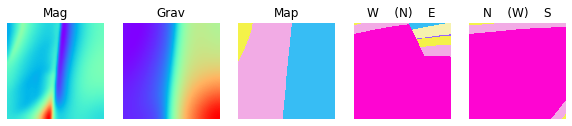

29 20-09-06-00-00-26-713527512 STRATIGRAPHY TILT TILT FOLD FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-06-00-00-26-713527512.his.gz


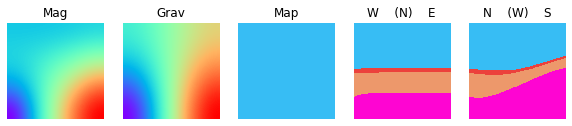

28 20-09-06-01-49-33-635388566 STRATIGRAPHY TILT TILT FOLD FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-06-01-49-33-635388566.his.gz


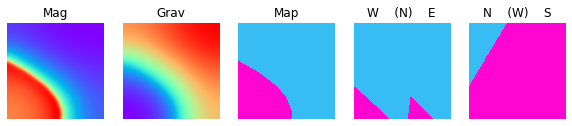

19 20-09-05-11-19-53-488540693 STRATIGRAPHY TILT TILT FOLD FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-05-11-19-53-488540693.his.gz


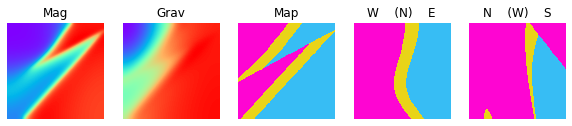

35 20-09-05-07-55-33-360678213 STRATIGRAPHY TILT TILT FOLD FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-05-07-55-33-360678213.his.gz


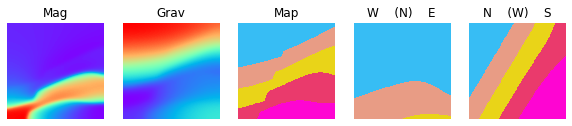

In [10]:
used=[]
for z in range (0,10):
    ran =random.randint(0,model_number2-1) 
    #ran=0
    if(ran in used):
        z=z-1
        continue
    else:
        used.append(ran)
    file_split=models2.iloc[ran]['root'].split('/')  
    root=url+file_split[2]
    
    path=root+'.mag.gz'
    try:
        mag=get_gz_array(path,8)
    except:
        z=z-1
        continue
    path=root+'.grv.gz'
    grv=get_gz_array(path,skiprows=8)

    path=root+'.g12.gz'
    mod=get_gz_array(path,skiprows=0)

    mod2=mod.reshape((200,200,200))
    mod2=np.transpose(mod2,(0,2,1))
    mod2.shape
    vmin=np.amin(mod2)
    vmax=np.amax(mod2)
    show=1    
    print(ran,file_split[2],'STRATIGRAPHY TILT',models2.iloc[ran]['event_all'])

    #fig.tight_layout()
    if(show==1):
        fig, ax = plt.subplots(1,5,figsize=(10,10))
        ax[0].axis('off')
        ax[1].axis('off')
        ax[2].axis('off')
        ax[3].axis('off')
        ax[4].axis('off')
        ax[0].title.set_text('Mag' )
        ax[1].title.set_text('Grav')
        ax[2].title.set_text('Map')
        ax[3].title.set_text('W    (N)    E')
        ax[4].title.set_text('N    (W)    S')
        ax[0].imshow(mag,cmap='rainbow')
        ax[1].imshow(grv,cmap='rainbow')
        ax[2].imshow(mod2[0,:,:],cmap=cmap, interpolation="nearest",vmin=vmin,vmax=vmax)
        ax[3].imshow(mod2[:,0,:],cmap=cmap, interpolation="nearest",vmin=vmin,vmax=vmax)
        ax[4].imshow(mod2[:,:,0],cmap=cmap, interpolation="nearest",vmin=vmin,vmax=vmax)
        print("Download .his file:",root+".his.gz")
        plt.show()
    else:
        matplotlib.image.imsave('grv/model_'+models2.iloc[ran]['root']+'_grv.png', mag,cmap='rainbow')
        matplotlib.image.imsave('mag/model_'+models2.iloc[ran]['root']+'_mag.png', grv,cmap='rainbow')
        matplotlib.image.imsave('map/model_'+models2.iloc[ran]['root']+'_map.png', mod2[0,:,:],cmap=cmap,vmin=vmin,vmax=vmax)
        matplotlib.image.imsave('secWE/model_'+models2.iloc[ran]['root']+'_secWE.png', mod2[:,0,:],cmap=cmap,vmin=vmin,vmax=vmax)
        matplotlib.image.imsave('secNS/model_'+models2.iloc[ran]['root']+'_secNS.png', mod2[:,:,0],cmap=cmap,vmin=vmin,vmax=vmax)